# Knowledge Data Discovery and Neural Networks : Final Project

In this notebook we will do some basic data analysis in python 

## Clarifications
1. The same score for the project will be given to each member of the team.  
2. When you are asked to provide a verbal solution - write it concisely and short (a couple of sentences).
3. Data decription can be found [here](https://archive.ics.uci.edu/ml/datasets/adult)

# 1. Imports

In [1]:
# add more packages in this section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
import math
import graphviz
from sklearn import svm
from sklearn import tree
from xgboost import XGBClassifier
from collections import defaultdict
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.set_option('display.max_rows', 100)
SEED = 0

# 2. Exploratory data analysis

In [2]:
data = pd.read_csv("adult.data", header = None, na_values=' ?')
cols = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss'
    ,'hours_per_week','native_country','y']
data.columns = cols
pd.set_option('display.max_columns', 20)

## 2.1 Row and column count
* How many rows and columns/features we have in the dataset? 

In [3]:
### YOUR CODE HERE
data.shape
### END YOUR CODE

(32561, 15)

## 2.2 Missing values proporiton
* For each feature - what is the percantage of missing values in it?
* Describe one method to fill missing data (data imputation)

If there will be many missing values then we will need to take it in consideration later 

In [4]:
### YOUR CODE HERE

null_value = data.isnull().sum()

y = data.values[:,-1]
counter = Counter(y)
for k,v in null_value.items():
    per = v / len(y) * 100
    print('Class=%s, null Count=%d, Percentage=%.1f%%' % (k, v, per))

### END YOUR CODE

Class=age, null Count=0, Percentage=0.0%
Class=workclass, null Count=1836, Percentage=5.6%
Class=fnlwgt, null Count=0, Percentage=0.0%
Class=education, null Count=0, Percentage=0.0%
Class=education_num, null Count=0, Percentage=0.0%
Class=marital_status, null Count=0, Percentage=0.0%
Class=occupation, null Count=1843, Percentage=5.7%
Class=relationship, null Count=0, Percentage=0.0%
Class=race, null Count=0, Percentage=0.0%
Class=sex, null Count=0, Percentage=0.0%
Class=capital_gain, null Count=0, Percentage=0.0%
Class=capital_loss, null Count=0, Percentage=0.0%
Class=hours_per_week, null Count=0, Percentage=0.0%
Class=native_country, null Count=583, Percentage=1.8%
Class=y, null Count=0, Percentage=0.0%


2. A possible method of filling in missing valuesis by a statistical estimate such as the average of neighbors or by common value.

In [5]:
# Another way of filling missing data is ny using the mode
data['native_country'].fillna(data['native_country'].mode()[0],inplace=True)
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)

## 2.3 Categorical features

* Which of the features are categorical type? for each feature like that, how many unique values it has?

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
y                 object
dtype: object

In [7]:
### YOUR CODE HERE

#Filtering data values without numbers
data_categorical = data.select_dtypes(exclude=["number"])

for col in data_categorical.columns:
    k = len(data_categorical[col].unique())
    print('%s, Unique Value=%.f' % (col, k))
### END YOUR CODE

workclass, Unique Value=8
education, Unique Value=16
marital_status, Unique Value=7
occupation, Unique Value=14
relationship, Unique Value=6
race, Unique Value=5
sex, Unique Value=2
native_country, Unique Value=41
y, Unique Value=2


## 2.4 Feature distribution

* Plot the distribution of each feature
* Is our data set balanced (do we have the same amount of <=50K and >50K in the label?)

In [13]:
# data set unbalanced
data['y'].value_counts()/data['y'].value_counts().sum()

 <=50K    0.75919
 >50K     0.24081
Name: y, dtype: float64

### 2.4 Answer
In the data, the amounts are not the same. 75% is low income expected

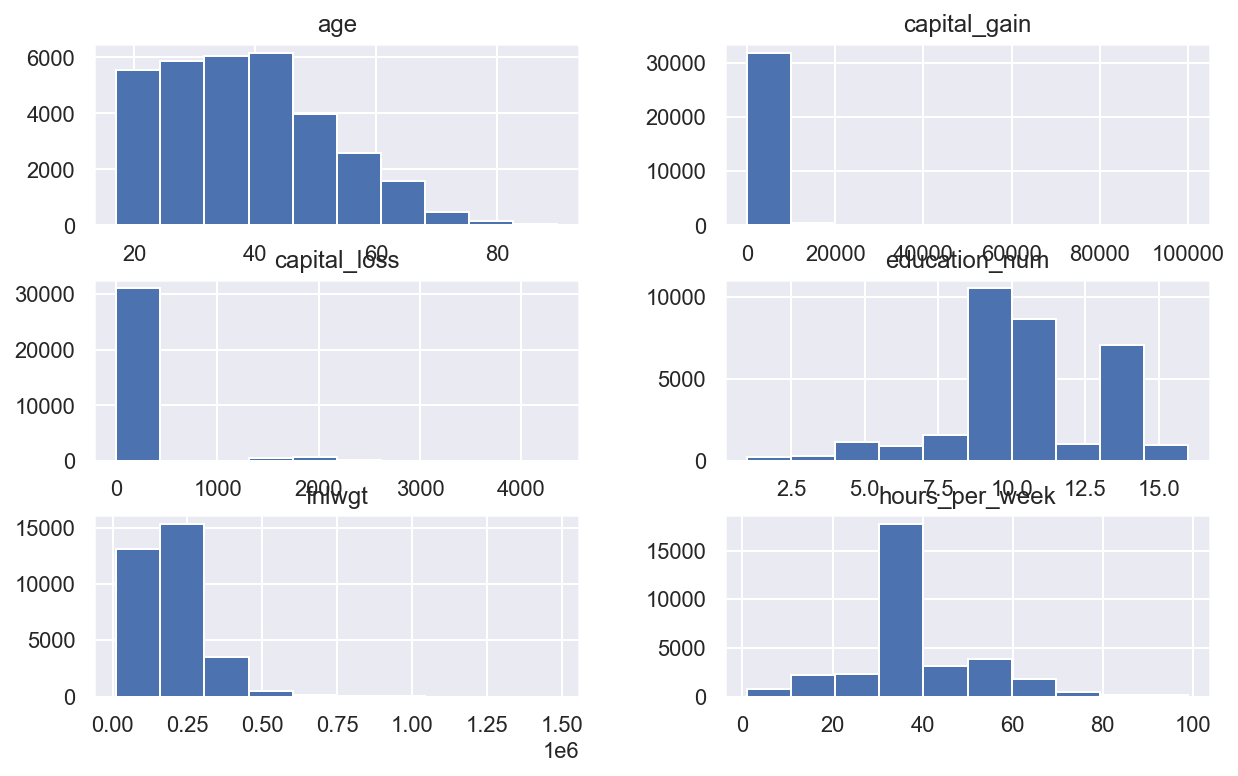

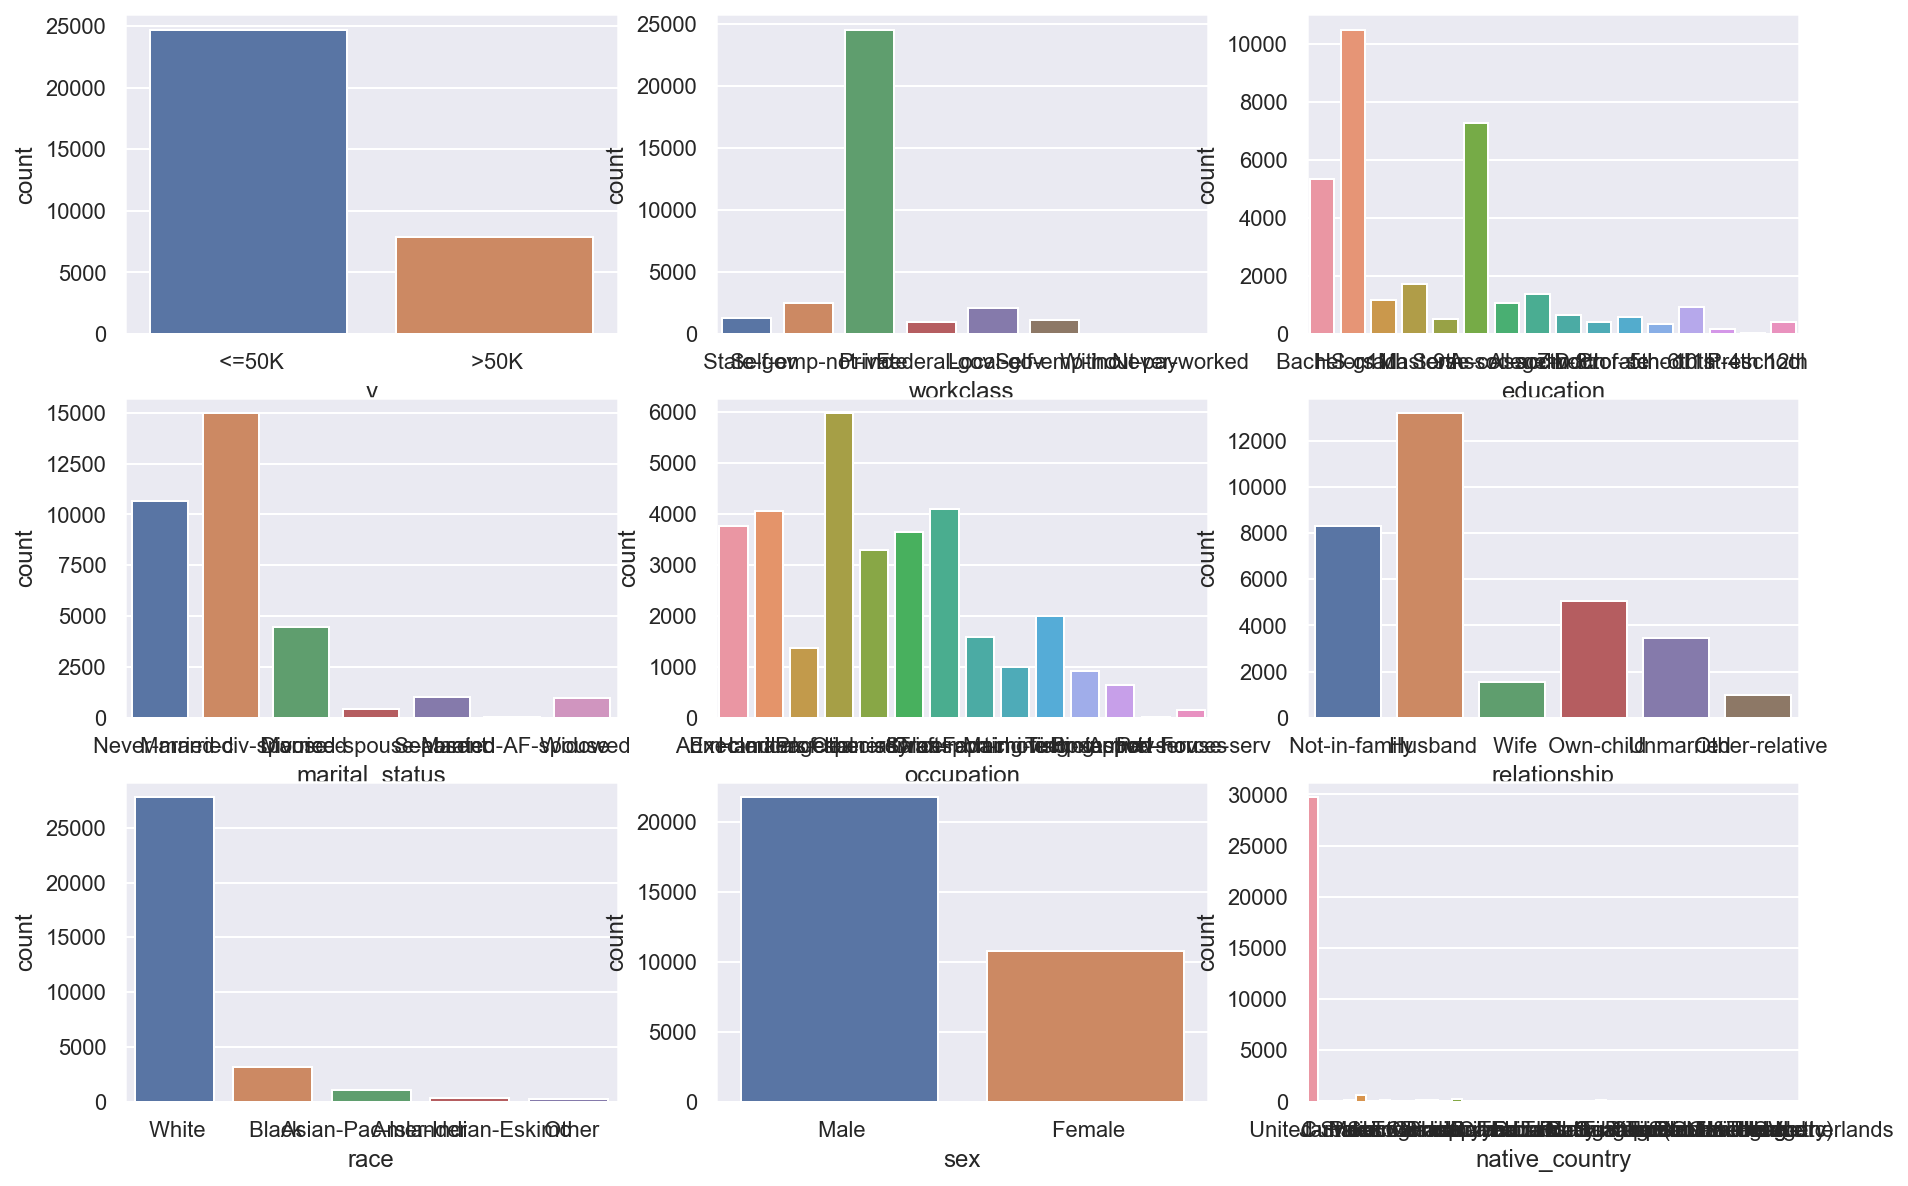

In [8]:
### YOUR CODE HERE
# drop rows with missing
data = data.dropna()
sns.set(rc={"figure.figsize": (10, 6)})
# select columns with numerical data types
num_ix = data.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = data[num_ix]
# create a histogram plot of each numeric variable
subset.hist()
plt.show()

#Categorial varibles Distribution
sns.set(rc={"figure.figsize": (15, 10)})
fig, ax =plt.subplots(3,3)
sns.countplot(data['y'], ax=ax[0,0])
sns.countplot(data['workclass'], ax=ax[0,1])
sns.countplot(data['education'], ax=ax[0,2])
sns.countplot(data['marital_status'], ax=ax[1,0])
sns.countplot(data['occupation'], ax=ax[1,1])
sns.countplot(data['relationship'], ax=ax[1,2])
sns.countplot(data['race'], ax=ax[2,0])
sns.countplot(data['sex'], ax=ax[2,1])
sns.countplot(data['native_country'], ax=ax[2,2])


### END YOUR CODE

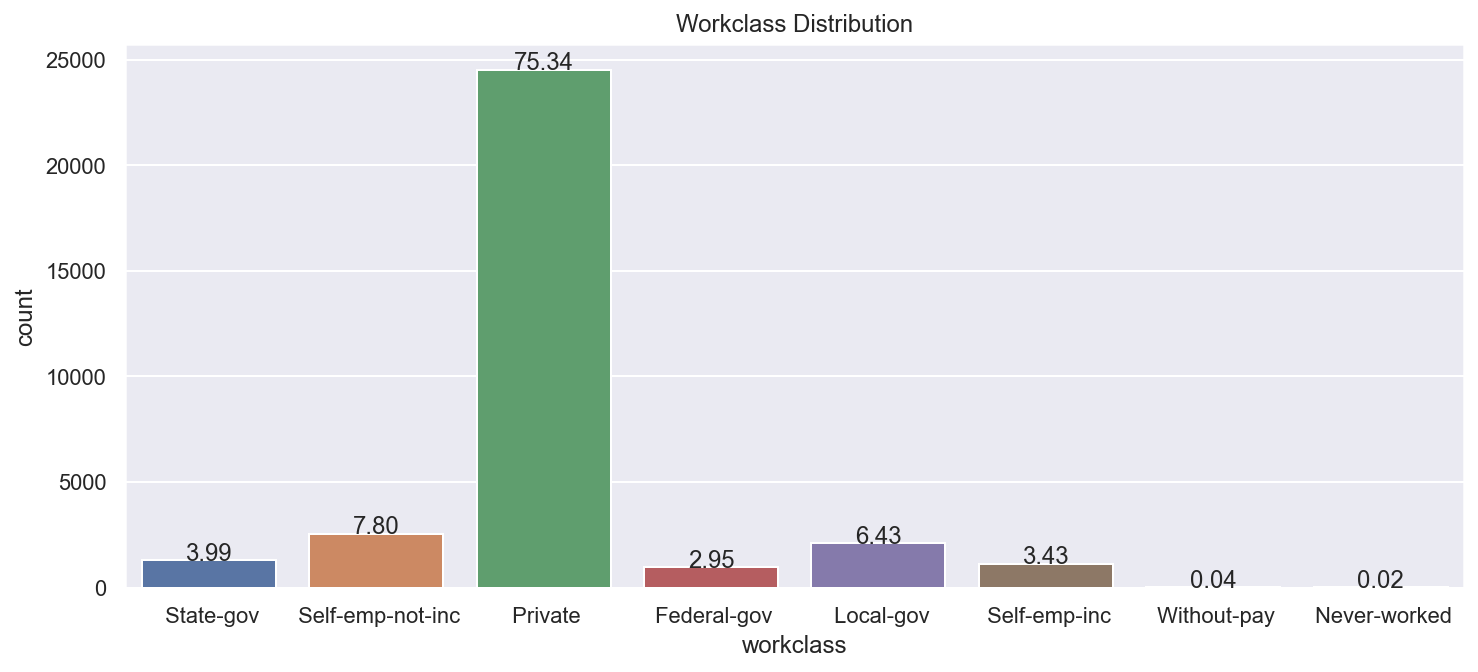

In [9]:
#Workclass Distribution
plt.figure(figsize=(12,5))

total = float(len(data['y']))

a = sns.countplot(x='workclass',data=data)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.title('Workclass Distribution')
plt.show()

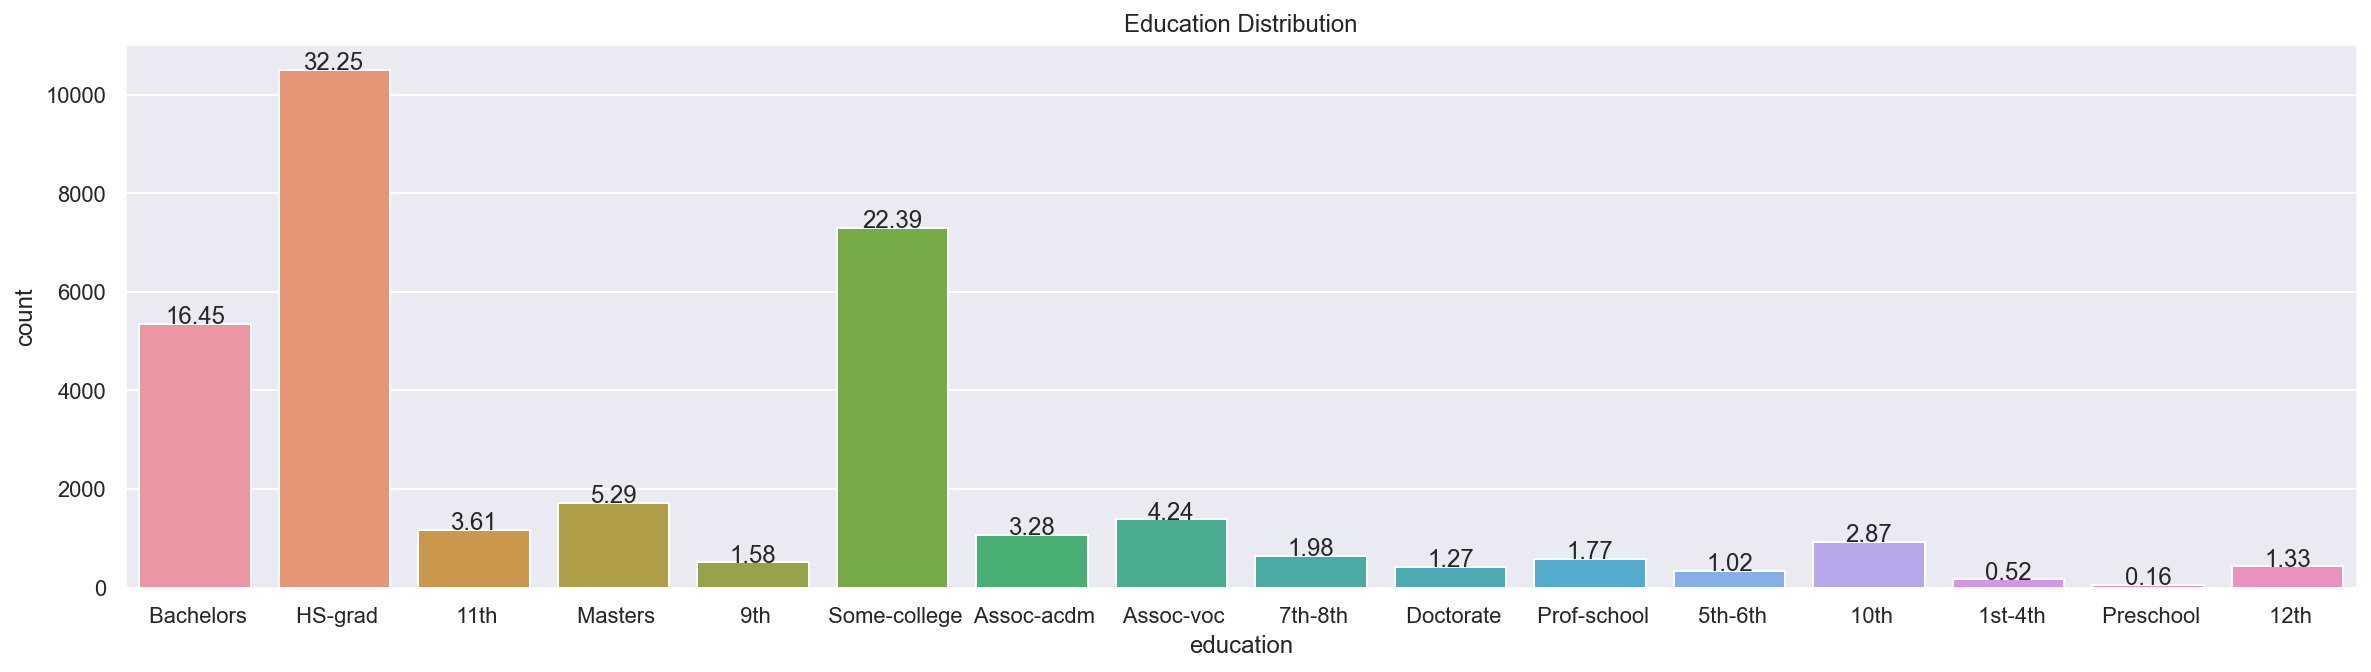

In [10]:
# Education Distribution:
plt.figure(figsize=(20,5))

a= float(len(['y']))

a= sns.countplot(x='education',data=data)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.title('Education Distribution')
plt.show()

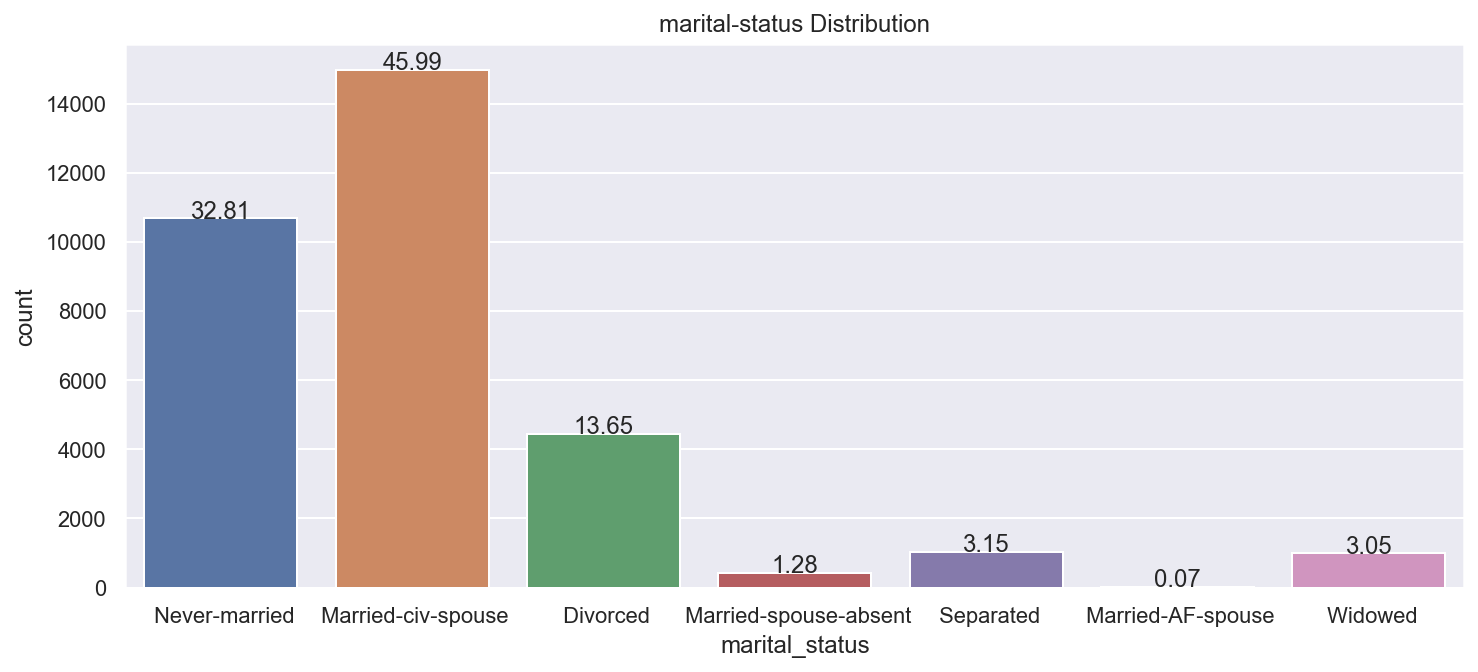

In [11]:
# marital-status Distribution
plt.figure(figsize=(12,5))
total = float(len(data) )

ax = sns.countplot(x="marital_status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('marital-status Distribution')
plt.show()

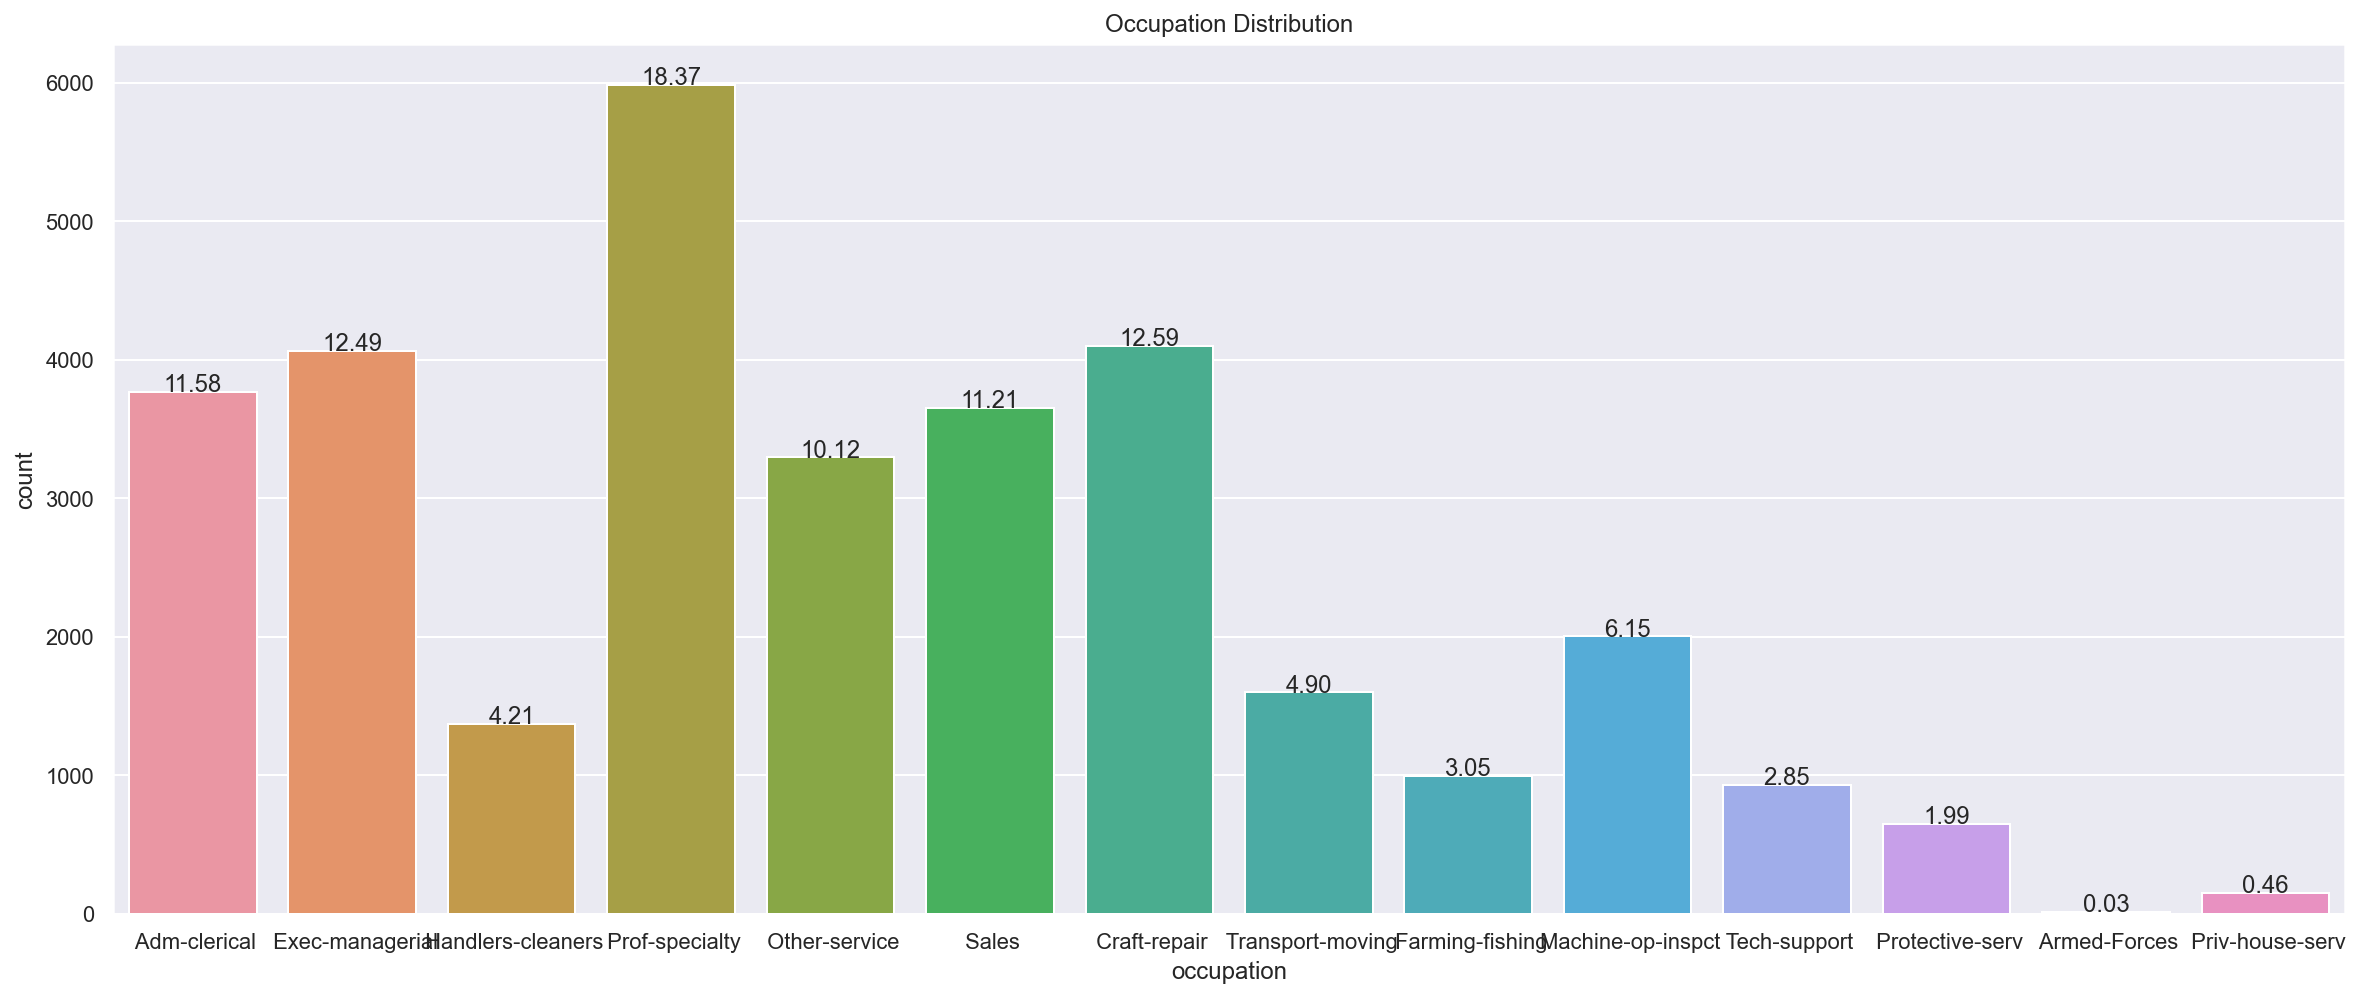

In [12]:
# Occupation Distribution
plt.figure(figsize=(20,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Occupation Distribution')
plt.show()


## 2.5 Correlation plot

* Plot a correlation plot between the numeric features

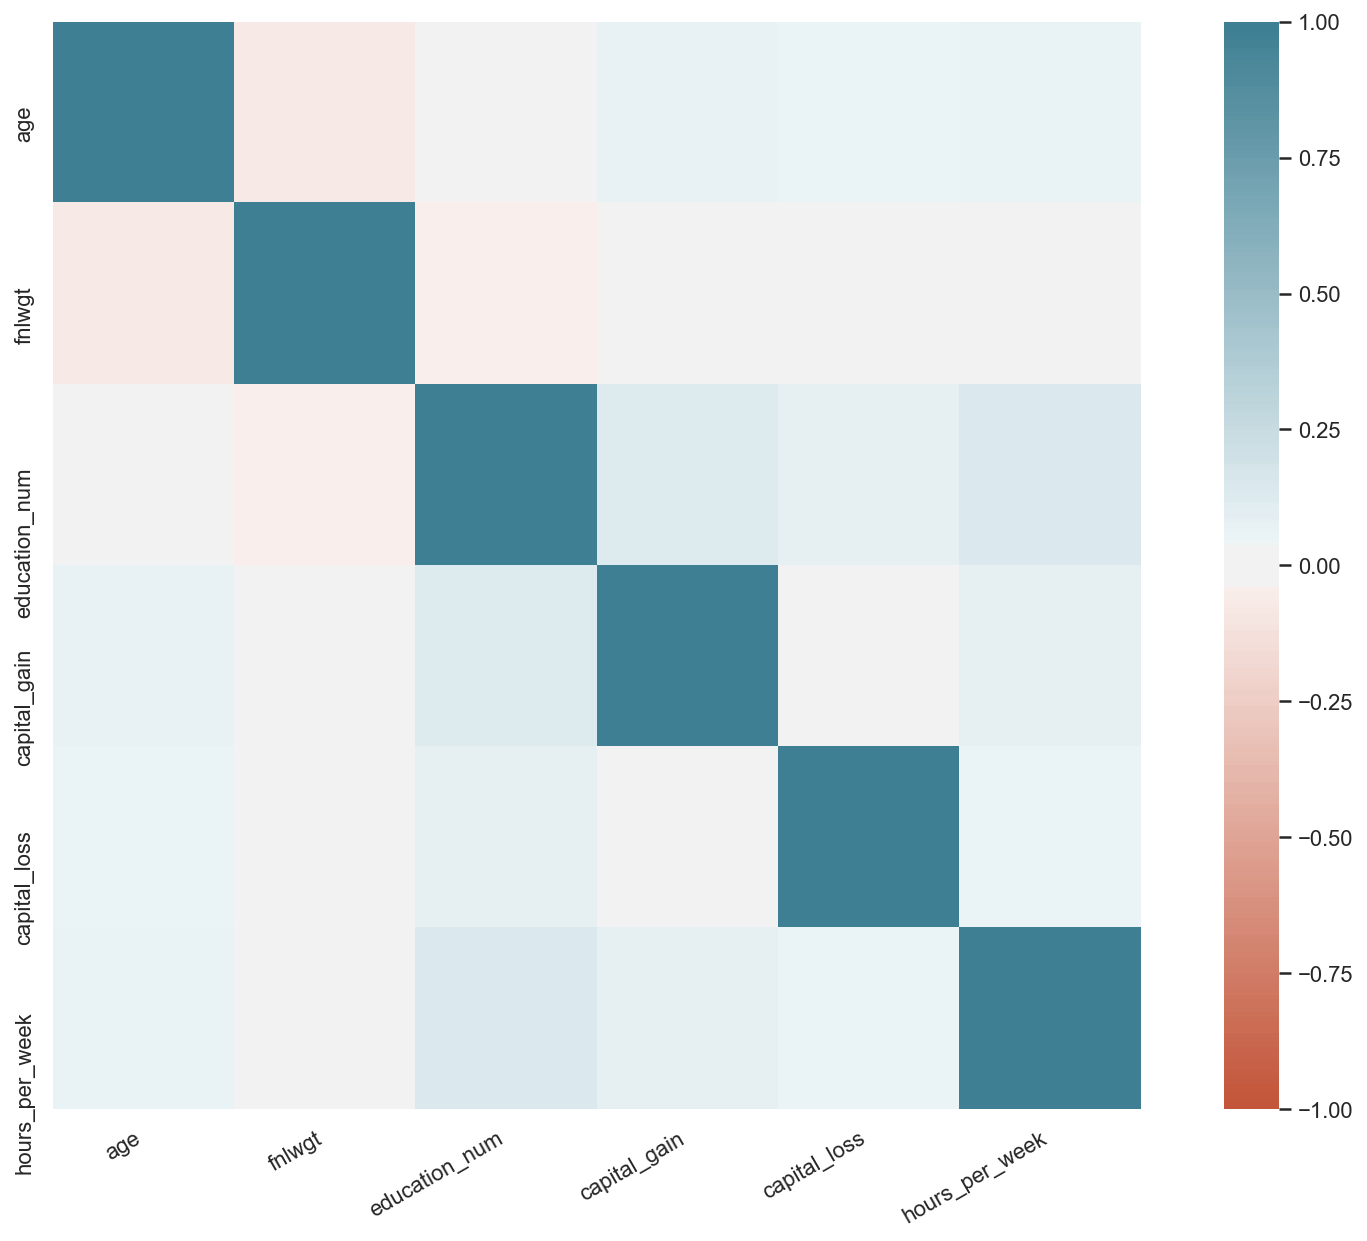

In [14]:
### YOUR CODE HERE

data_int = data.select_dtypes(exclude=['object'])
corr = data_int.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
    );
### END YOUR CODE

## 2.6 Important features

* Try to understand which features will be important for the prediction and back it up with a plot or two that shows it.

It is an open question and there are many ways to approach it. 

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

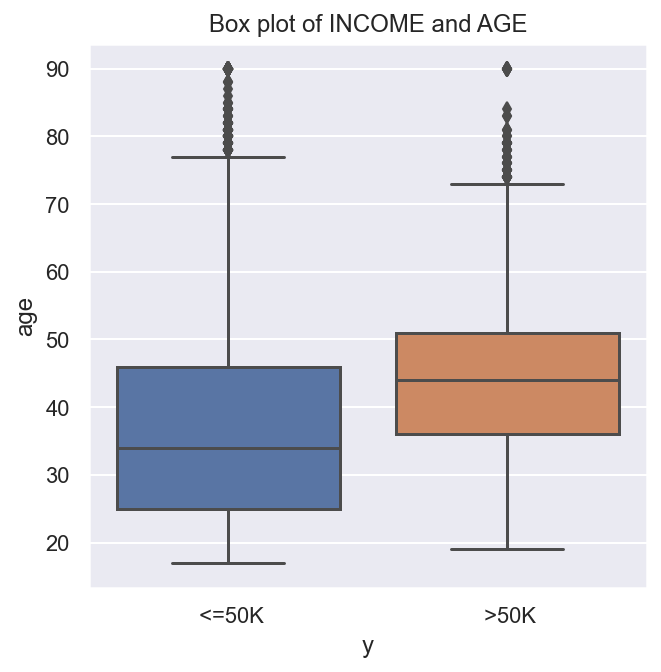

In [15]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='y',y='age',data=data).set_title('Box plot of INCOME and AGE')

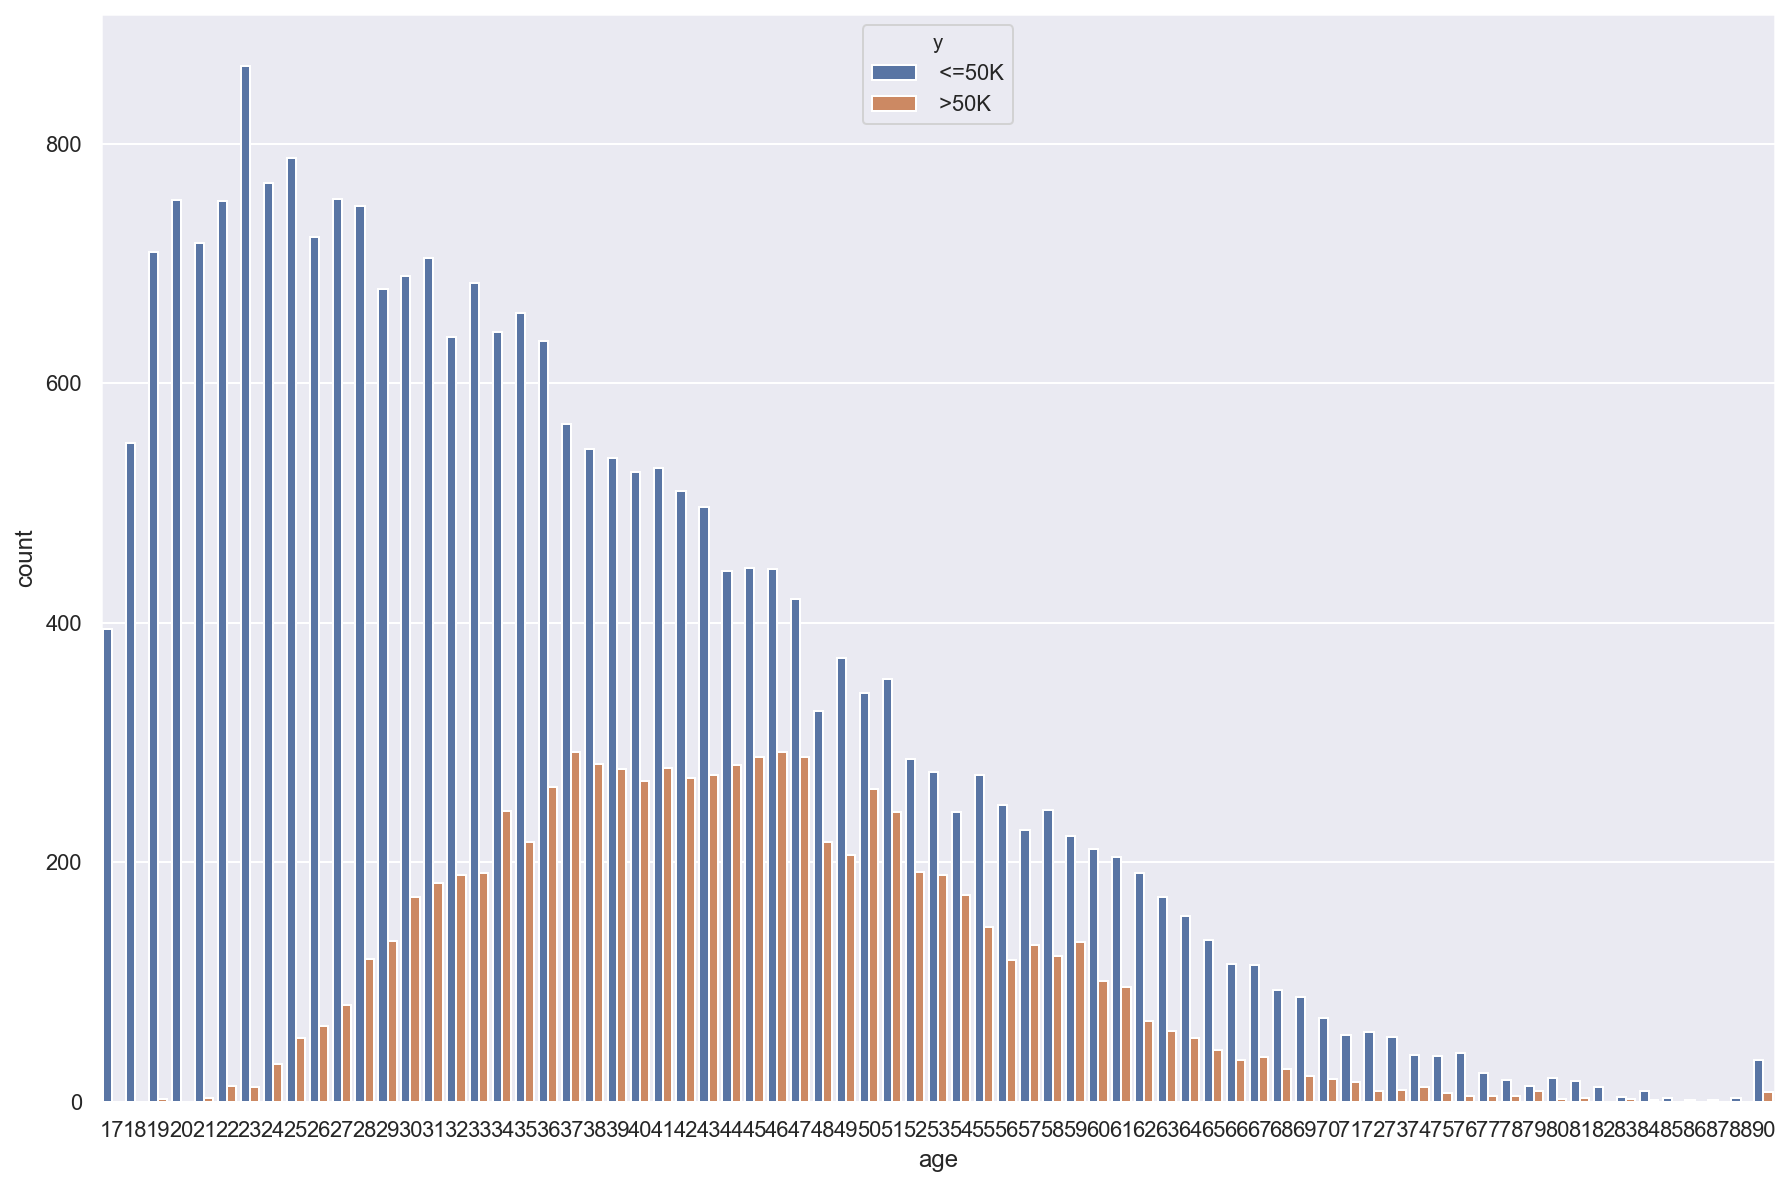

In [16]:

sns.countplot(x='age', hue='y', data = data)


Text(0.5, 1.0, 'workclass split based on Income')

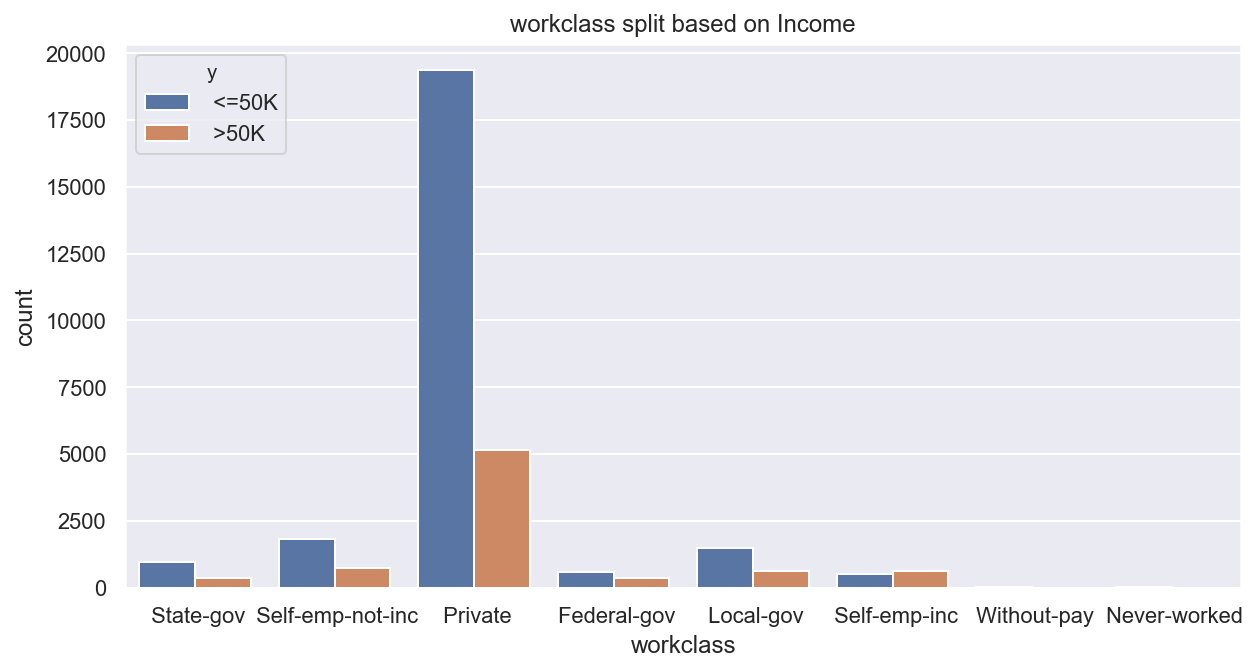

In [17]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='y',data=data).set_title("workclass split based on Income")

In [27]:
#1 select a subset of the dataframe with the chosen columns
cat_ix = data.select_dtypes(include=['object']).columns
cat_ix =list(cat_ix)
for i in range(8):
    data[cat_ix[i]]= data[cat_ix[i]].str.replace(" ","")


In [19]:
#2 Sort features by importance
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [22]:
# 3. Select only numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = data.select_dtypes(include=numerics)
data['y'] = data['y'].replace({' <=50K': 0, ' >50K': 1}).astype(int)

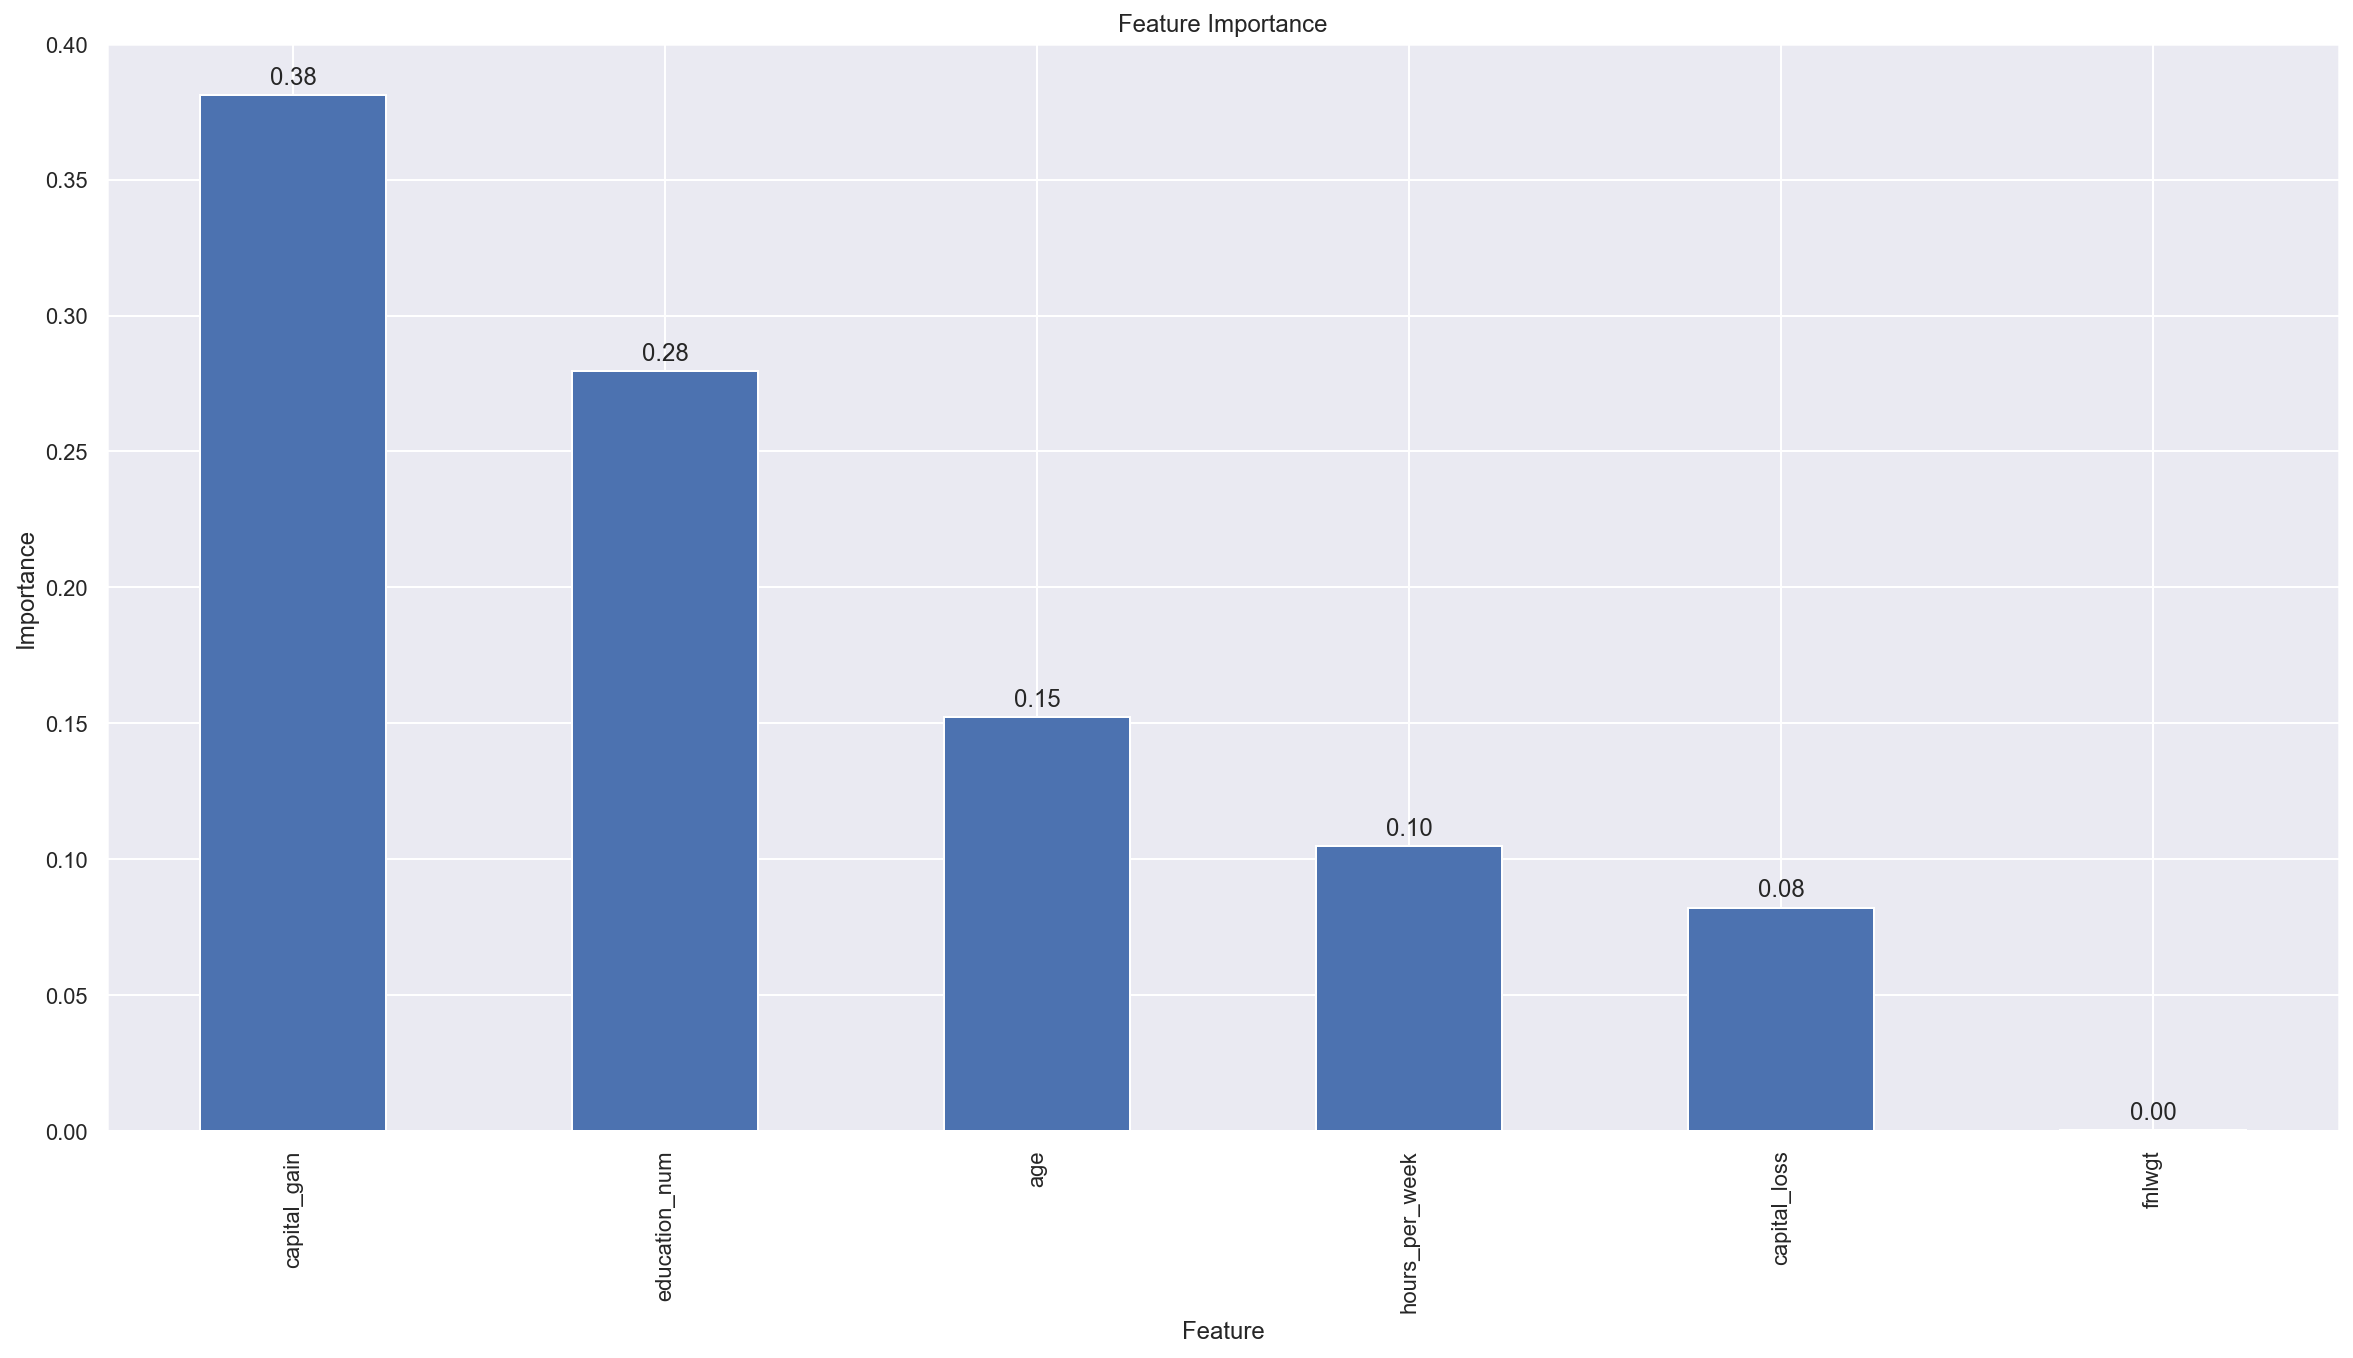

In [26]:
# 4. Impute Features
df_imputed = SimpleImputer(strategy='median').fit_transform(df_numeric)

#5 plot
rf = RandomForestClassifier(max_depth=2, random_state=SEED)
rf.fit(df_imputed,y)

fig, ax = plt.subplots(figsize=(20,10))
feature_importance = pd.Series(rf.feature_importances_, index=df_numeric.columns)
feature_importance.sort_values(ascending=False).head(21).plot.bar(title="Feature Importance")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
autolabel(ax.patches)
plt.show()

##### YOUR VERBAL SOLUTION HERE

1. In the top two graphs we can see the good distribution of Y within the features. We can also see in the bar plot(block41) the variables of the highest importance (Random Forest is used here).
The best explain variables are Capital gain, education num, age, hours per week and capital loss.
We observed that the distribution of high incomes by age is narrow and centered among older ages, in addition capital gain and loos could also be good indicators since high income people probably have more money active in investments (gaining profits and losses), rather t
#### END YOUR VERBAL SOLUTION HERE
